In [1]:
from lib.preamble import *
%matplotlib widget

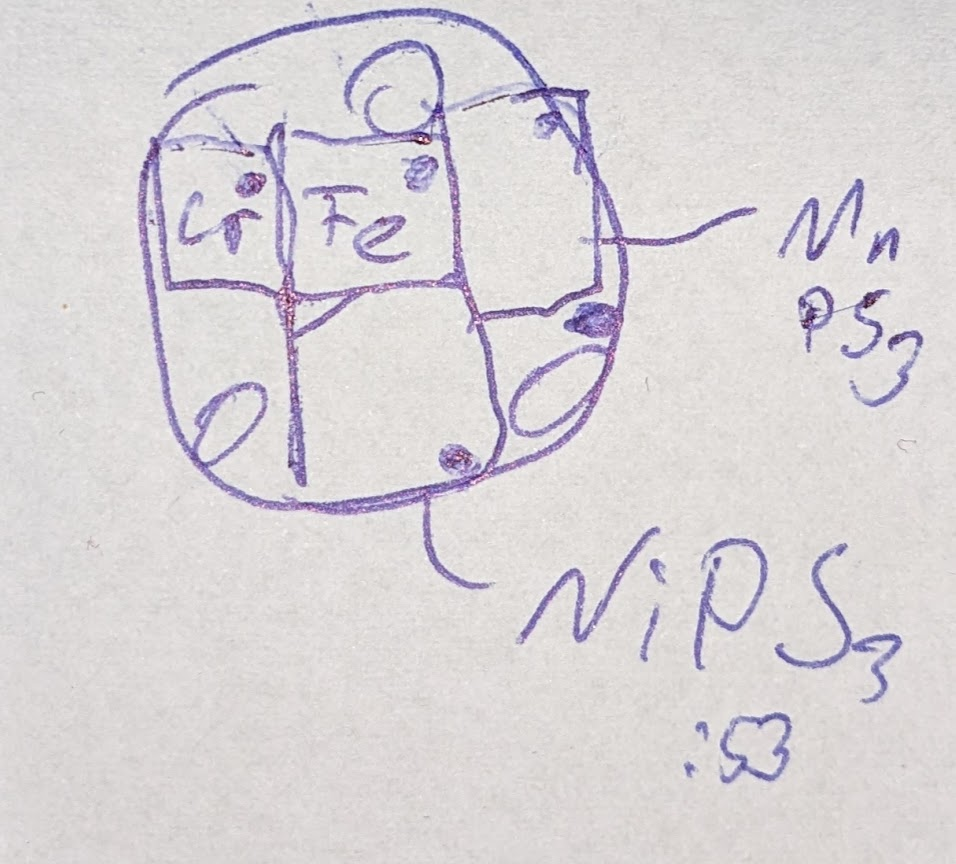

# NiPS3

## Luminescence

excited at 515 nm.

In [2]:
paths = glob("d001*.asc")
paths += glob("d002*.asc")

# if df already exists, append to it
df = pd.DataFrame(map(import_spectrum, paths)).set_index("experiment")
df

,wavelength,intensity,material,method,capture,temperature,angle,name,remaining,path
experiment,,,,,,,,,,
1,"[830.08209, 830.1604, 830.23877, 830.31714, 83...","[4400.0, 4384.0, 4380.0, 4374.0, 4371.0, 4371....",NiPS3,luminescence,10x10s,None,None,d001 10x10s NiPS lm 0.43mW onSample,"[0.43mW, onSample]",d001_10x10s_NiPS_lm_0.43mW_onSample.asc
2,"[560.0, 560.086, 560.17194, 560.25787, 560.343...","[4289.0, 4286.76, 4285.72, 4288.13, 4291.2, 42...",NiPS3,luminescence,10x10s,None,None,d002 10x10s NiPS lm 0.43mW onSample,"[0.43mW, onSample]",d002_10x10s_NiPS_lm_0.43mW_onSample.asc


/home/leon/Projekte/Studium/2023_WS/batchelorarbeit/src/lib/utils.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1239.84187/ev


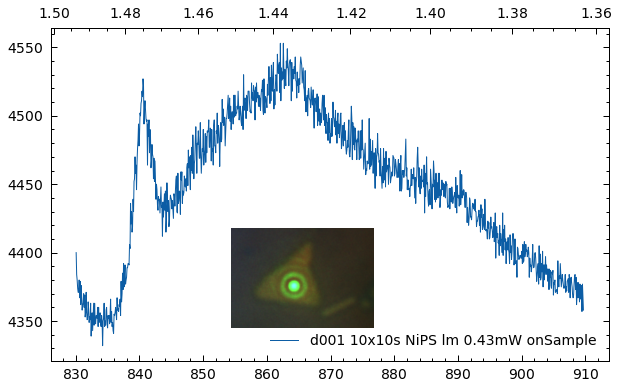

In [3]:
from PIL import Image

def plot_spectrum(d):
	plt.plot(d.wavelength, d.intensity, label=d["name"])

plt.figure()
plot_spectrum(df.loc[1])
plt.legend()
plot.energy_ticks()
# plt.xlim(600, None)

ax = plt.gca()
axins = ax.inset_axes([0.3, 0.1, 0.3, 0.3])
img1 = Image.open('d001.bmp', 'r')
axins.imshow(img1)
axins.axis('off')
axins.set_xlim(850, 1100)
axins.set_ylim(300, 475)

plt.savefig("d001.png")
plt.show()

The intensity ratio between the peak at 840nm and 860nm varies with the excitation power.

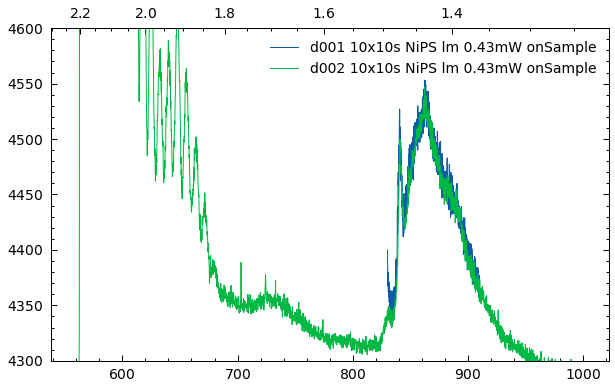

In [4]:
plt.figure()
plot_spectrum(df.loc[1])
plot_spectrum(df.loc[2])
plt.ylim(4300, 4600)

plot.energy_ticks()
plt.legend()
plt.show()

is there a peak at $\leq 830$ nm?


## Reflectance

In [5]:
paths = glob("d003*.asc")
df = df[df.index != 3]
df = df.combine_first(pd.DataFrame(map(import_spectrum, paths)).set_index("experiment").sort_values("path"))
df.loc[3]

,wavelength,intensity,material,method,capture,temperature,angle,name,remaining,path
experiment,,,,,,,,,,
3,"[400.0, 400.08881, 400.17758, 400.26636, 400.3...","[4292.0, 4287.99, 4288.55, 4291.84, 4293.92, 4...",NiPS3,reflectance,10x10s,NaN,NaN,d003 10x10s NiPS refl dark,[dark],d003_10x10s_NiPS_refl_dark.asc
3,"[400.0, 400.08881, 400.17758, 400.26636, 400.3...","[4325.0, 4319.61, 4320.6, 4323.31, 4322.55, 43...",NiPS3,reflectance,10x10s,NaN,NaN,d003 10x10s NiPS refl offSample,[offSample],d003_10x10s_NiPS_refl_offSample.asc
3,"[400.0, 400.08881, 400.17758, 400.26636, 400.3...","[4326.0, 4328.49, 4327.17, 4326.13, 4324.14, 4...",NiPS3,reflectance,10x10s,NaN,NaN,d003 10x10s NiPS refl onSample,[onSample],d003_10x10s_NiPS_refl_onSample.asc


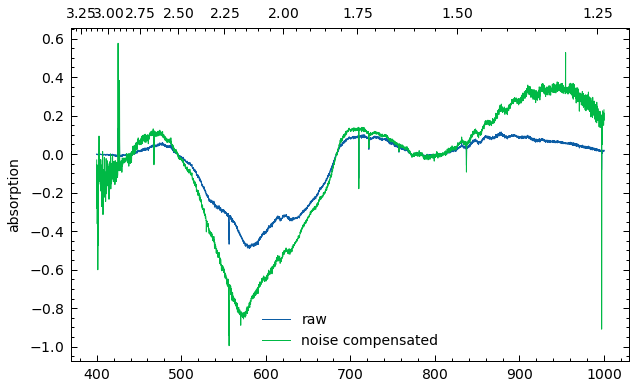

/home/leon/Projekte/Studium/2023_WS/batchelorarbeit/src/lib/utils.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1239.84187/ev


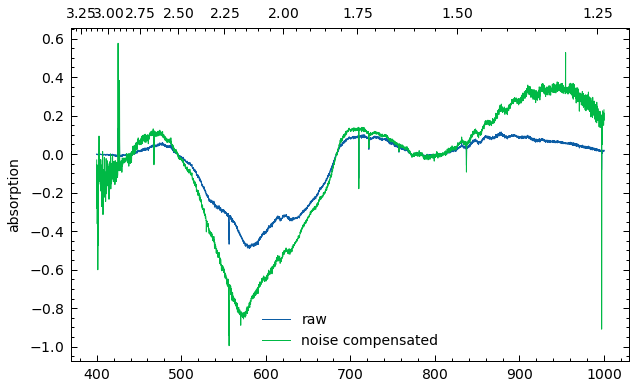

In [6]:
sel = df.loc[3]

wavelength = sel.iloc[0].wavelength
dark = sel.iloc[0].intensity

plt.figure()
plt.plot(wavelength,1- (sel.iloc[2].intensity) / (sel.iloc[1].intensity), label="raw")
plt.plot(wavelength,1- (sel.iloc[2].intensity - dark)/(sel.iloc[1].intensity - dark), label="noise compensated")
plot.energy_ticks()
plt.ylabel("absorption")
# plt.xlim(750, 925)
# plt.ylim(-.1, .4)
plt.legend()
plt.show()

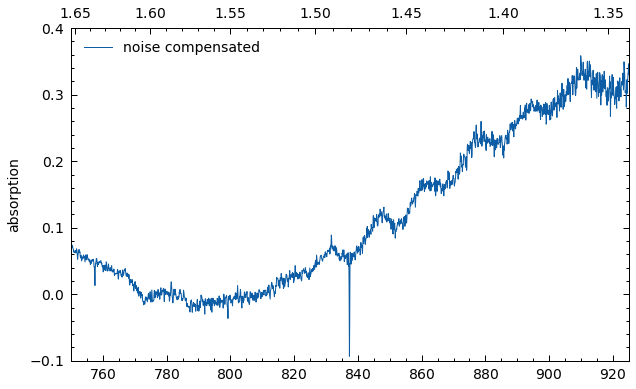

In [7]:
sel = df.loc[3]

wavelength = sel.iloc[0].wavelength
dark = sel.iloc[0].intensity

plt.figure()
# plt.plot(wavelength,1- (sel.iloc[2].intensity) / (sel.iloc[1].intensity), label="raw")
plt.plot(wavelength,1- (sel.iloc[2].intensity - dark)/(sel.iloc[1].intensity - dark), label="noise compensated")
plot.energy_ticks()
plt.ylabel("absorption")
plt.xlim(750, 925)
plt.ylim(-.1, .4)
plt.legend()
plt.show()

In [8]:
1/(2/877+2/860)

217.1042026482441

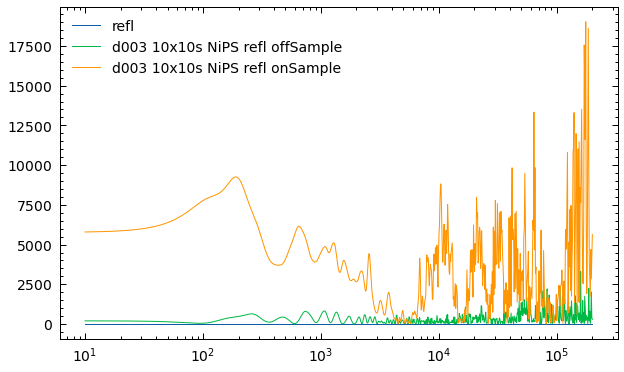

In [9]:
thicknesses = np.geomspace(10, 200e3, 1000)

df["thickness_signal_raw"] = df.apply(
	lambda x: calc_thickness(x.wavelength, x.intensity, thicknesses, imf=False),
	axis=1
)

df["thickness_signal_imf"] = df.apply(
	lambda x: calc_thickness(x.wavelength, x.intensity, thicknesses, imf=True),
	axis=1
)

thickness_signal = calc_thickness(wavelength, (sel.iloc[2].intensity - dark)/(sel.iloc[1].intensity - dark), thicknesses, imf=True)

sel = df.loc[3]

plt.figure()
plt.plot(thicknesses, thickness_signal, label="refl")
plt.plot(thicknesses, sel.iloc[1].thickness_signal_imf, label=sel.iloc[1]["name"])
plt.plot(thicknesses, sel.iloc[2].thickness_signal_imf, label=sel.iloc[2]["name"])
plt.legend()
plt.xscale("log")
plt.show()

# MnPS3

3d transition (like in NiPS3) are according to: [_Fluorescence spectra of the layered semiconductor compound MnPS3_](https://journals.aps.org/prb/pdf/10.1103/PhysRevB.40.5529) found  at:

In [10]:
# excitation
ev_to_nm(np.array([3.44, 3.26, 3.10]))

array([360.41914826, 380.31959202, 399.94899032])

In [11]:
# emission
ev_to_nm(2.55)

486.2124980392157

/home/leon/Projekte/Studium/2023_WS/batchelorarbeit/src/lib/utils.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1239.84187/ev


486.2124980392157

/home/leon/Projekte/Studium/2023_WS/batchelorarbeit/src/lib/utils.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1239.84187/ev


486.2124980392157

The lowest laser in this setup is 405nm. I didn't find a sharp enough filter.

# FePS3

In [12]:
# emission
ev_to_nm(np.array([1.8, 2.3, 2.5]))

array([688.80103889, 539.06168261, 495.936748  ])

# CrPS3

1mW 515nm laser for luminesces

In [13]:
# emission
ev_to_nm(np.array([1.1, 1.38, 1.32]))

array([1127.12897273,  898.43613768,  939.27414394])

In [14]:
paths = glob("d004*.asc")
df = df[df.index != 4]
df = df.combine_first(pd.DataFrame(map(import_spectrum, paths)).set_index("experiment"))
df.loc[4]

,angle,capture,intensity,material,method,name,path,remaining,temperature,thickness_signal_imf,thickness_signal_raw,wavelength
experiment,,,,,,,,,,,,
4,NaN,5x10s,"[1829.0, 1821.33, 1819.87, 1825.18, 1826.54, 1...",CrPS4,luminescence,d004 5x10s CrPS lm onSample,d004_5x10s_CrPS_lm_onSample.asc,[onSample],NaN,NaN,NaN,"[560.0, 560.086, 560.17194, 560.25787, 560.343..."
4,NaN,2x10s,"[893.0, 892.052, 889.235, 887.455, 889.6, 891....",CrPS4,luminescence,d004 2x10s CrPS lm onSample,d004_2x10s_CrPS_lm_onSample.asc,[onSample],NaN,NaN,NaN,"[800.0, 800.0575, 800.11493, 800.17236, 800.22..."
4,NaN,2x10s,"[891.0, 890.008, 886.774, 883.744, 884.28, 889...",CrPS4,luminescence,d004 2x10s CrPS lm offSample,d004_2x10s_CrPS_lm_offSample.asc,[offSample],NaN,NaN,NaN,"[800.0, 800.0575, 800.11493, 800.17236, 800.22..."


/home/leon/Projekte/Studium/2023_WS/batchelorarbeit/src/lib/utils.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1239.84187/ev


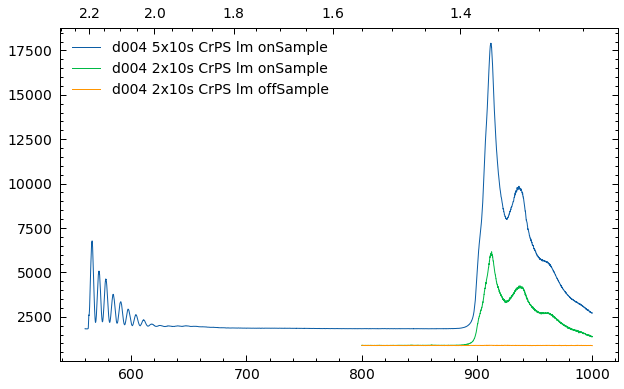

In [15]:
plt.figure()
for i, d in df.loc[4].iterrows(): plot_spectrum(d)
plt.legend()
plot.energy_ticks()
plt.show()

### Reflection

In [16]:
paths = glob("d005*.asc")
df = df[df.index != 5]
df = df.combine_first(pd.DataFrame(map(import_spectrum, paths)).set_index("experiment"))
df.loc[5]

,angle,capture,intensity,material,method,name,path,remaining,temperature,thickness_signal_imf,thickness_signal_raw,wavelength
experiment,,,,,,,,,,,,
5,NaN,5x10s,"[1831.0, 1830.7, 1829.5, 1829.24, 1828.52, 182...",CrPS4,reflectance,d005 5x10s CrPS refl offSample,d005_5x10s_CrPS_refl_offSample.asc,[offSample],NaN,NaN,NaN,"[400.0, 400.11722, 400.23441, 400.35162, 400.4..."
5,NaN,5x10s,"[1834.0, 1830.64, 1829.16, 1827.98, 1829.64, 1...",CrPS4,reflectance,d005 5x10s CrPS refl onSample,d005_5x10s_CrPS_refl_onSample.asc,[onSample],NaN,NaN,NaN,"[400.0, 400.11722, 400.23441, 400.35162, 400.4..."


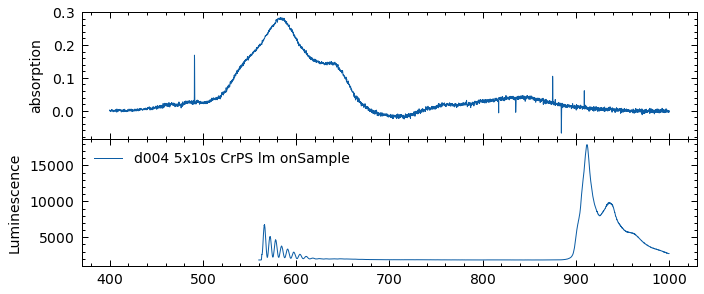

In [17]:
plt.figure()
# ax = plt.subplot(3, 1, 1)
# for i, d in df.loc[5].iterrows(): plot_spectrum(d)
# plot.energy_ticks()
# plt.legend()

plt.subplot(3, 1, 2, sharex=ax)
plt.plot(
	df.loc[5].iloc[0].wavelength,
	1-df.loc[5].iloc[0].intensity/df.loc[5].iloc[1].intensity
)
plt.ylabel("absorption")

plt.subplot(3, 1, 3, sharex=ax)
plot_spectrum(df.loc[4].iloc[0])
plt.ylabel("Luminescence")
plt.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()

In [18]:
1/(2/652+2/735)

172.75414563806777

/home/leon/Projekte/Studium/2023_WS/batchelorarbeit/src/lib/utils.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1239.84187/ev


172.75414563806777